In [1]:
#Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading datasets
#main dataset
df = pd.read_csv('../data/covid.csv')
#region and climate dataset
df_cat = pd.read_csv('../data/covid_cat.csv')

#### Change Countries name, so there will no be same country with different name

In [2]:
df["country"]=df["country"].replace("('St. Martin',)",'St. Martin')
df["country"]=df["country"].replace(' Azerbaijan','Azerbaijan')
df["country"]=df["country"].replace('Cabo Verde','Cape Verde')
df["country"]=df["country"].replace(['Congo (Brazzaville)','Congo (Kinshasa)'],'Congo')
df["country"]=df["country"].replace(['North Ireland','Republic of Ireland'],'Ireland')
df["country"]=df["country"].replace('North Macedonia','Macedonia')
df["country"]=df["country"].replace(['occupied Palestinian territory','West Bank and Gaza'],'Palestine')
df["country"]=df["country"].replace(['Holy See','Vatican City'],'Vatican')
df["country"]=df["country"].replace(['The Bahamas','Bahamas, The'],'Bahamas')
df["country"]=df["country"].replace(['The Gambia','Gambia, The'],'Gambia')
df["country"]=df["country"].replace('East Timor','Timor-Leste')
df["country"]=df["country"].replace(['MS Zaandam','Diamond Princess'],'Others')


In [3]:
# accumulate data group by country and date
df_new=df.groupby(['country','date']).sum().reset_index()
# adding country and region from df_cat dataframe 
df_new = pd.merge(df_new, df_cat, on=['country'], how='left')
# filterring dataframe from 2020 march 1st until 2020 december 13th
df_new.dropna(subset = ["region","climate"], inplace=True)
for x in df_new.index:
    if (df_new.loc[x,'confirmed']<100) or (pd.to_datetime(df_new.loc[x,'date']) < pd.to_datetime('2020/03/1')) or (pd.to_datetime(df_new.loc[x,'date']) > pd.to_datetime('2020/12/13')):
        df_new.drop(x,inplace=True)


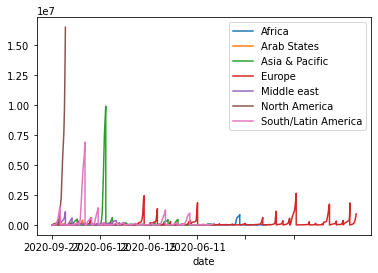

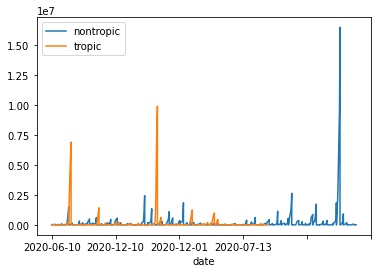

In [4]:
fig, ax = plt.subplots()
for key, grp in df_new.groupby('region'):
    grp.plot(x = "date", y = 'confirmed',ax = ax, label = key)

fig, ax = plt.subplots()
for key, grp in df_new.groupby('climate'):
    grp.plot(x = "date", y = 'confirmed',ax = ax, label = key)


e.


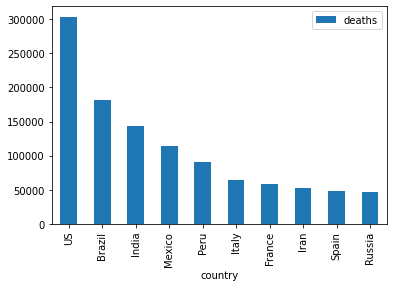

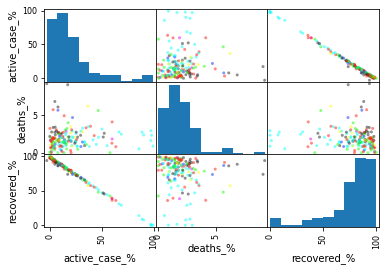

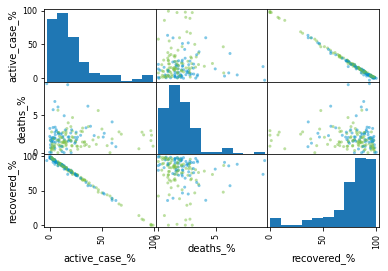

In [5]:
df_last = df_new.sort_values('date').groupby('country').tail(1)
# show plot for top 10 largest death cases

df_last.nlargest(10, ['deaths']).plot('country','deaths',kind='bar')


df_last['active_case'] = df_last['confirmed'] - df_last['recovered'] - df_last['deaths']
df_last['active_case_%'] = df_last['active_case'] * 100 / df_last['confirmed']
df_last['deaths_%'] = df_last['deaths'] * 100 / df_last['confirmed']
df_last['recovered_%'] = df_last['recovered'] * 100 / df_last['confirmed']
# scatter plot based on region

color_wheel_region = {"Africa": "#FE1907", 
                      "Arab States": "#FBFE07", 
                      "Asia & Pacific": "#17FE07", 
                      "Europe": "#07FEFC", 
                      "Middle east": "#072FFE", 
                      "North America": "#E107FE", 
                      "South/Latin America": "#201F20"}
colors_region = df_last["region"].map(lambda x: color_wheel_region.get(x))
ax_region = pd.plotting.scatter_matrix(df_last[['active_case_%', 'deaths_%', 'recovered_%']], color=colors_region)
# scatter plot based on climate
print("e.")
color_wheel_climate = {"tropic": "#0392cf", 
               "nontropic": "#7bc043"}
colors_climate = df_last["climate"].map(lambda x: color_wheel_climate.get(x))
ax_climate = pd.plotting.scatter_matrix(df_last[['active_case_%', 'deaths_%', 'recovered_%']], color=colors_climate)


In [6]:
pearsonCorr = df_last[['active_case_%', 'deaths_%', 'recovered_%']].corr(method='pearson')
print(pearsonCorr)
pearsonCorr.style.background_gradient(cmap='Reds')



               active_case_%  deaths_%  recovered_%
active_case_%       1.000000  0.034203    -0.997663
deaths_%            0.034203  1.000000    -0.102413
recovered_%        -0.997663 -0.102413     1.000000


,active_case_%,deaths_%,recovered_%
active_case_%,1.000000,0.034203,-0.997663
deaths_%,0.034203,1.000000,-0.102413
recovered_%,-0.997663,-0.102413,1.000000


In [7]:
from scipy.stats import pearsonr
def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

print(df_last[['active_case_%', 'deaths_%', 'recovered_%']].corr(method=pearsonr_pval))
# conclusion
# By comparing the p-value with alpha = 0.05"
# In active_case and recovered there is a negative linear correlation and the relationship is significant
# In the data between active_case and deaths, the correlation between the two positive data is linear which is not strong and there is no significance between the two data
# In the data between deaths and recovered, the correlation between the two negative data is linear which is not strong and there is no significance between the two data

               active_case_%  deaths_%    recovered_%
active_case_%   1.000000e+00  0.663717  1.011343e-190
deaths_%        6.637175e-01  1.000000   1.919163e-01
recovered_%    1.011343e-190  0.191916   1.000000e+00


In [8]:
import scipy.stats as ss
dfn_val = df_last.nunique()["region"] - 1
dfd_val = len(df_last) - df_last.nunique()["region"]
print('F table: {:.3f}'.format(ss.f.ppf(q=1-0.05, dfn=dfn_val, dfd=dfd_val)))

#Tes ANOVA active_case_%
gb = df_last.groupby("region")
f_val_ac, p_val_ac = ss.f_oneway(gb[["active_case_%"]].get_group("Africa")
                           ,gb[["active_case_%"]].get_group("Arab States")
                           ,gb[["active_case_%"]].get_group("Asia & Pacific")
                           ,gb[["active_case_%"]].get_group("Europe")
                           ,gb[["active_case_%"]].get_group("Middle east")
                           ,gb[["active_case_%"]].get_group("North America")
                           ,gb[["active_case_%"]].get_group("South/Latin America"))
print('F value for active case: {:.3f}'.format(f_val_ac[0]))
print('Conclusion: There is a significant effect of active casess based on the Region')

#Tes ANOVA deaths_%
f_val_d, p_val_d = ss.f_oneway(gb[["deaths_%"]].get_group("Africa")
                           ,gb[["deaths_%"]].get_group("Arab States")
                           ,gb[["deaths_%"]].get_group("Asia & Pacific")
                           ,gb[["deaths_%"]].get_group("Europe")
                           ,gb[["deaths_%"]].get_group("Middle east")
                           ,gb[["deaths_%"]].get_group("North America")
                           ,gb[["deaths_%"]].get_group("South/Latin America"))
print('F value for deaths: {:.3f}'.format(f_val_d[0]))
print('Conclusion: There is a significant effect of death cases based on the Region')

#Tes ANOVA recovered_%
f_val_r, p_val_r = ss.f_oneway(gb[["recovered_%"]].get_group("Africa")
                           ,gb[["recovered_%"]].get_group("Arab States")
                           ,gb[["recovered_%"]].get_group("Asia & Pacific")
                           ,gb[["recovered_%"]].get_group("Europe")
                           ,gb[["recovered_%"]].get_group("Middle east")
                           ,gb[["recovered_%"]].get_group("North America")
                           ,gb[["recovered_%"]].get_group("South/Latin America"))
print('F value for recovered: {:.3f}'.format(f_val_r[0]))
print('Conclusion: There is a significant effect of recovery number based on the Region')


F table: 2.157
F value for active case: 6.500
Conclusion: There is a significant effect of active casess based on the Region
F value for deaths: 3.180
Kesimpulan: There is a significant effect of death cases based on the Region
F value for recovered: 6.212
Kesimpulan: There is a significant effect of recovery number based on the Region


In [10]:
#Tes ANOVA active_case_%
print('T table: {:.3f}'.format(ss.t.ppf(1-0.025, len(df_last)-df_last.nunique()["climate"])))
gb = df_last.groupby("climate")
f_val_ac,p_val_ac = ss.ttest_ind(gb[["active_case_%"]].get_group("tropic")
                           ,gb[["active_case_%"]].get_group("nontropic"))
print('T Value for active case: {:.3f}'.format(f_val_ac[0]))
print('Conclusion: Climate differency give a significant effect to active cases')

#Tes ANOVA deaths_%
f_val_d, p_val_d = ss.ttest_ind(gb[["deaths_%"]].get_group("tropic")
                           ,gb[["deaths_%"]].get_group("nontropic"))
print('T value for deaths: {:.3f}'.format(f_val_d[0]))
print('Conclusion: Climate differency give a significant effect to death cases')

#Tes ANOVA recovered_%
f_val_r, p_val_r = ss.ttest_ind(gb[["recovered_%"]].get_group("tropic")
                           ,gb[["recovered_%"]].get_group("nontropic"))
print('T value for recovered: {:.3f}'.format(f_val_r[0]))
print('Conclusion: Climate differency give a significant effect to recovery numbers')

T table: 1.975
T Value for active case: -3.242
Conclusion: Climate differency give a significant effect to active cases
T value for deaths: 2.799
Conclusion: Climate differency give a significant effect to death cases
T value for recovered: 3.022
Conclusion: Climate differency give a significant effect to recovery numbers


In [11]:
X_new=np.array([[1000,30,200],
       [2000,40,400],
       [50,1,2]])
safetyCol = []
for x in df_last.index:
    safetyCol.append("safe") if ((df_last.loc[x,'active_case_%'] < 10) and (df_last.loc[x,'deaths_%'] < 5) and (df_last.loc[x,'recovered_%'] > 85)) else safetyCol.append("not_safe")
df_last['safety'] = safetyCol

print("number countries with safe category ",df_last.safety.value_counts().loc["not_safe"])
print("number of countries with safe category  ",df_last.safety.value_counts().loc["safe"])

number countries with safe category  110
number of countries with safe category   54


In [12]:
X_new=np.array([[1000,30,200],
       [2000,40,400],
       [50,1,2]])

df_train = df_last.loc[(df_last['country'] == "Indonesia") |
                    (df_last['country'] == "US") |
                    (df_last['country'] == "Brazil") |
                    (df_last['country'] == "New Zealand") |
                    (df_last['country'] == "Singapore") ]
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train = df_train[['active_case_%','deaths_%','recovered_%']]
y_train = df_train['safety']
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(df_last[['active_case_%','deaths_%','recovered_%']])
score =accuracy_score(df_last['safety'],y_pred)
print("Accuracy of the model",score)


df_safety_certain_country = df_last.loc[(df_last['country'] == "Indonesia") |
                                     (df_last['country'] == "US") |
                                     (df_last['country'] == "Brazil") |
                                     (df_last['country'] == "New Zealand") |
                                     (df_last['country'] == "Singapore") ].filter(["country",'active_case_%','deaths_%','recovered_%',"safety"])
df_safety_certain_country["safety_pred"] = logreg.predict(df_safety_certain_country[['active_case_%','deaths_%','recovered_%']])
print(df_safety_certain_country)

Accuracy of the model 0.8963414634146342
            country  active_case_%  deaths_%  recovered_%    safety  \
14770        Brazil       8.435309  2.628271    88.936420      safe   
112738           US      59.901270  1.843278    38.255453  not_safe   
97666     Singapore       0.142318  0.049726    99.807956      safe   
77570   New Zealand       2.671756  1.192748    96.135496      safe   
48682     Indonesia      15.079635  3.046033    81.874332  not_safe   

       safety_pred  
14770         safe  
112738    not_safe  
97666         safe  
77570         safe  
48682     not_safe  


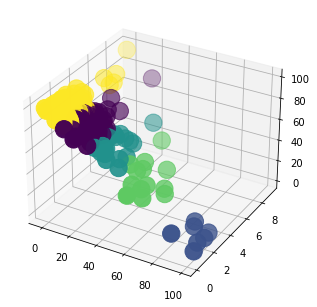

Predicted cluster for Indonesia is: 0
Predicted cluster for Singapore is: 4
Predicted cluster for US is: 3
Predicted cluster for Italy is: 2
Predicted cluster for Iran is: 0


In [23]:
Z=df_last.loc[:,['active_case_%', 'deaths_%', 'recovered_%']].values

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans


data = np.array(Z)

model = KMeans(n_clusters=5)
model.fit_predict(data)
pred = model.fit_predict(data)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:,0], data[:,1], data[:,2], c=model.labels_, s=300)
plt.show()

print("Predicted cluster for Indonesia is:",model.predict(np.array(df_last.loc[(df_last['country'] == "Indonesia")][['active_case_%','deaths_%','recovered_%']]))[0])
print("Predicted cluster for Singapore is:",model.predict(np.array(df_last.loc[(df_last['country'] == "Singapore")][['active_case_%','deaths_%','recovered_%']]))[0])
print("Predicted cluster for US is:",model.predict(np.array(df_last.loc[(df_last['country'] == "US")][['active_case_%','deaths_%','recovered_%']]))[0])
print("Predicted cluster for Italy is:",model.predict(np.array(df_last.loc[(df_last['country'] == "Italy")][['active_case_%','deaths_%','recovered_%']]))[0])
print("Predicted cluster for Iran is:",model.predict(np.array(df_last.loc[(df_last['country'] == "Iran")][['active_case_%','deaths_%','recovered_%']]))[0])